# Séance 4 : Classe 1

In [6]:
#!pip install powerlaw
import powerlaw
# documentation très utile de powerlaw
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats

Visualisation de la loi de Pareto, que l'on va utiliser de nombreuses fois dans le cours. 

In [8]:
a, xmin = 2.5 , 1.0
N = 10000

# generates random variates of power law distribution
xx = list(powerlaw.Power_Law(xmin=xmin, parameters=[a]).generate_random(N))


In [10]:
xx[:10]

[1.4712327188128402,
 1.5294663700247204,
 1.327435839440235,
 2.285453272572365,
 1.4788483182038927,
 1.7717507567189892,
 2.3420949358274337,
 3.56068162099615,
 1.2528082113797716,
 3.2199496735551034]

In [11]:
max(xx)
#il y a des valeurs extrêmes pour cette distribution.

409.87840674862775

In [12]:
min(xx)

1.000061820408084

# 1-Plotting linear histogram

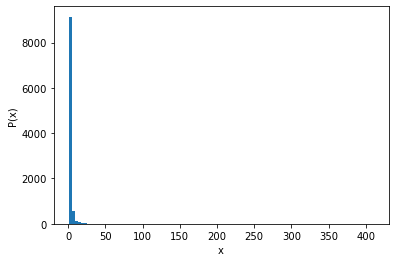

In [13]:
plt.hist(xx,bins=100)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

Le premier pic prend toute la visualisation, on voit pas les valeurs hautes, ce n'est pas terrible.

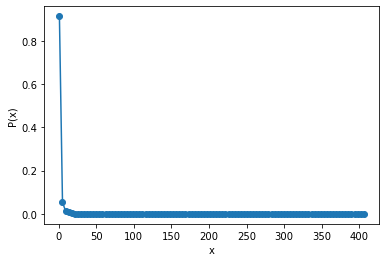

In [14]:
ybinLin,xbinLin=np.histogram(xx,bins=100)
ynorm=[float(i)/sum(ybinLin) for i in ybinLin]
# Il y a une valeur de plus donc ne pas mettre la valeur finale sinon pb de taille
plt.plot(xbinLin[:-1],ynorm,'o-')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

Idem, la visualisation n'est toujours pas très claire.

# 2-Plotting log-log histogram

On fait du log-log.

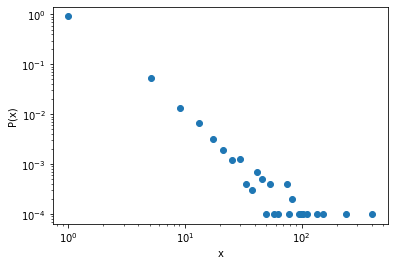

In [15]:
plt.loglog(xbinLin[:-1],ynorm,'o')

plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 3- Plotting cumulative distribution

Je prends toutes les valeurs à partir d'une certaines valeur. J'obtiens une valeur cumulative. 

In [16]:
ycum=[sum(ynorm[i:]) for i in range(len(ynorm))]

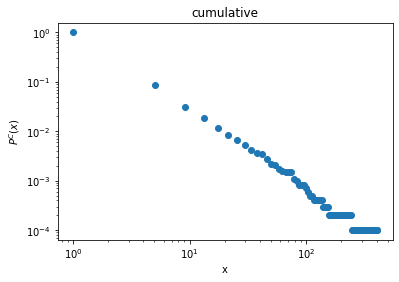

In [17]:
plt.loglog(xbinLin[:-1],ycum,'o')
plt.title('cumulative')
plt.xlabel('x')
plt.ylabel('$P^C(x)$')
plt.show()

# 4- Plotting binned distribution


Fonction qui permet de trouver les intervalles logarithmiques. 

In [49]:
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

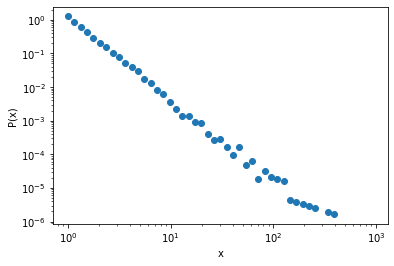

In [53]:
y,x=logBinning(np.array(xx),50)
plt.loglog(x,y,'o')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 5-calculating power-law fit

In [58]:
def powerLaw(x, a, b):
    return b*x**(a)

-2.50233564155225


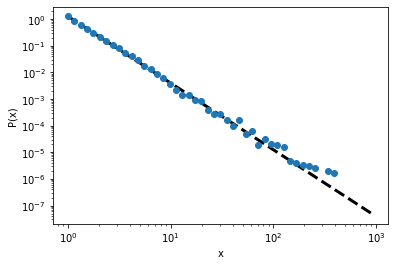

In [64]:
# Je sélectionne les points où x<100
fitx=[i for (i,j) in zip(x,y) if i<100]
fity=[j for (i,j) in zip(x,y) if i<100]
popt, pcov = curve_fit(powerLaw, fitx, fity)  
# Ca me donne l'exposant. 
print ("exposant :", popt[0])
# données du fit : on doit trier pour que la ligne ça suive la direction.
plt.loglog(sorted(x), powerLaw(sorted(x), *popt), '--',c='k',linewidth=3)
#vraies données
plt.loglog(x,y,'o')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# 6-Plot ranking

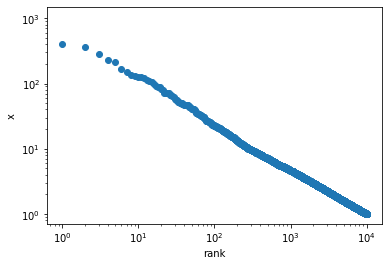

In [70]:
plt.loglog(range(len(xx)),sorted(xx,reverse=True),'o')

plt.xlabel('rank')
plt.ylabel('x')
plt.show()

# BIVARIATE STATISTICS

xx is distributed according to a power-law distribution. yy is derived from a uniform distribution. I have a set of bivariate variables: (x,y)

In [75]:
yy=[random.uniform(0,1) for i in xx]

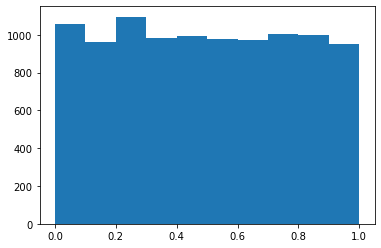

In [78]:
plt.hist(yy)
plt.show()

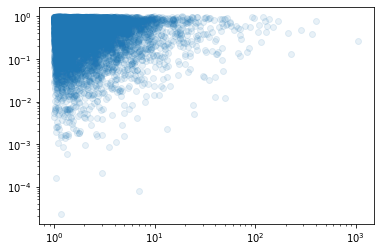

In [86]:
# simple plot of the (x,y) couples
plt.loglog(xx,yy,'o',alpha=0.1)
plt.show()

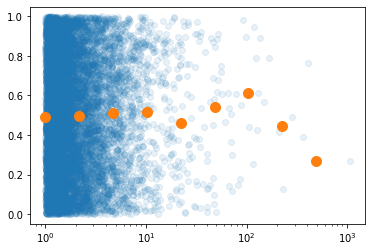

In [98]:
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=10)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.semilogx(xx,yy,'o',alpha=0.1)
plt.semilogx(xbin[:-1],ybin,'o',markersize=10)
plt.show()

In [99]:
bin_stdevs, _, _ = scipy.stats.binned_statistic(xx, yy, 
                                    statistic='std', 
                                    bins=logBins)

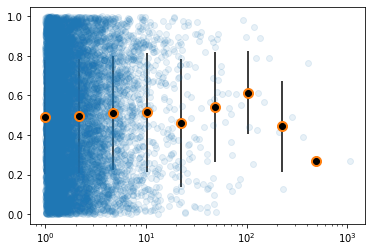

In [112]:
logBins=np.logspace(np.log2(np.min(xx)),np.log2(np.max(xx)),base=2,num=10)
ybin,xbin,binnumber=scipy.stats.binned_statistic(xx,yy,statistic='mean',bins=logBins)
plt.semilogx(xx,yy,'o',alpha=0.1)
plt.semilogx(xbin[:-1],ybin,'o',markersize=10)

plt.errorbar(xbin[:-1], ybin, bin_stdevs, fmt='o',color="k")
plt.show()